# Classifier on CIFAR10

## Using 3-Layer MLP

In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.3697 - accuracy: 0.1328

  5/196 [..............................] - ETA: 2s - loss: 2.3196 - accuracy: 0.1203

  9/196 [>.............................] - ETA: 2s - loss: 2.3057 - accuracy: 0.1263

 13/196 [>.............................] - ETA: 2s - loss: 2.2913 - accuracy: 0.1406

 17/196 [=>............................] - ETA: 2s - loss: 2.2791 - accuracy: 0.1530

 21/196 [==>...........................] - ETA: 2s - loss: 2.2642 - accuracy: 0.1674

 25/196 [==>...........................] - ETA: 2s - loss: 2.2544 - accuracy: 0.1742

 29/196 [===>..........................] - ETA: 2s - loss: 2.2448 - accuracy: 0.1828

 33/196 [====>.........................] - ETA: 2s - loss: 2.2375 - accuracy: 0.1911

 37/196 [====>.........................] - ETA: 2s - loss: 2.2307 - accuracy: 0.1980

 41/196 [=====>........................] - ETA: 2s - loss: 2.2240 - accuracy: 0.2023

 45/196 [=====>........................] - ETA: 2s - loss: 2.2170 - accuracy: 0.2063

 49/196 [======>.......................] - ETA: 2s - loss: 2.2102 - accuracy: 0.2129

 53/196 [=======>......................] - ETA: 1s - loss: 2.2039 - accuracy: 0.2158

 57/196 [=======>......................] - ETA: 1s - loss: 2.1964 - accuracy: 0.2207

 61/196 [========>.....................] - ETA: 1s - loss: 2.1897 - accuracy: 0.2250

 65/196 [========>.....................] - ETA: 1s - loss: 2.1854 - accuracy: 0.2263

 69/196 [=========>....................] - ETA: 1s - loss: 2.1805 - accuracy: 0.2294

 73/196 [==========>...................] - ETA: 1s - loss: 2.1758 - accuracy: 0.2316

 77/196 [==========>...................] - ETA: 1s - loss: 2.1714 - accuracy: 0.2335

 81/196 [===========>..................] - ETA: 1s - loss: 2.1659 - accuracy: 0.2359

 85/196 [============>.................] - ETA: 1s - loss: 2.1616 - accuracy: 0.2375

 89/196 [============>.................] - ETA: 1s - loss: 2.1569 - accuracy: 0.2396

 93/196 [=============>................] - ETA: 1s - loss: 2.1519 - accuracy: 0.2417

 97/196 [=============>................] - ETA: 1s - loss: 2.1475 - accuracy: 0.2438

101/196 [==============>...............] - ETA: 1s - loss: 2.1429 - accuracy: 0.2454

105/196 [===============>..............] - ETA: 1s - loss: 2.1388 - accuracy: 0.2472

109/196 [===============>..............] - ETA: 1s - loss: 2.1343 - accuracy: 0.2499

113/196 [================>.............] - ETA: 1s - loss: 2.1306 - accuracy: 0.2518

117/196 [================>.............] - ETA: 1s - loss: 2.1269 - accuracy: 0.2533

121/196 [=================>............] - ETA: 1s - loss: 2.1227 - accuracy: 0.2552

125/196 [==================>...........] - ETA: 0s - loss: 2.1188 - accuracy: 0.2558

129/196 [==================>...........] - ETA: 0s - loss: 2.1153 - accuracy: 0.2575

133/196 [===================>..........] - ETA: 0s - loss: 2.1123 - accuracy: 0.2582

137/196 [===================>..........] - ETA: 0s - loss: 2.1091 - accuracy: 0.2592

141/196 [====================>.........] - ETA: 0s - loss: 2.1060 - accuracy: 0.2605

145/196 [=====================>........] - ETA: 0s - loss: 2.1027 - accuracy: 0.2615

149/196 [=====================>........] - ETA: 0s - loss: 2.0995 - accuracy: 0.2634

153/196 [======================>.......] - ETA: 0s - loss: 2.0960 - accuracy: 0.2646

157/196 [=======================>......] - ETA: 0s - loss: 2.0928 - accuracy: 0.2660

161/196 [=======================>......] - ETA: 0s - loss: 2.0896 - accuracy: 0.2675

165/196 [========================>.....] - ETA: 0s - loss: 2.0868 - accuracy: 0.2688

169/196 [========================>.....] - ETA: 0s - loss: 2.0839 - accuracy: 0.2698

173/196 [=========================>....] - ETA: 0s - loss: 2.0816 - accuracy: 0.2710

177/196 [==========================>...] - ETA: 0s - loss: 2.0791 - accuracy: 0.2724

181/196 [==========================>...] - ETA: 0s - loss: 2.0766 - accuracy: 0.2733

185/196 [===========================>..] - ETA: 0s - loss: 2.0738 - accuracy: 0.2744

189/196 [===========================>..] - ETA: 0s - loss: 2.0712 - accuracy: 0.2749

193/196 [============================>.] - ETA: 0s - loss: 2.0686 - accuracy: 0.2759

196/196 [==============================] - 3s 16ms/step - loss: 2.0668 - accuracy: 0.2769 - val_loss: 1.9395 - val_accuracy: 0.3292


Epoch 2/3
  1/196 [..............................] - ETA: 0s - loss: 1.9518 - accuracy: 0.3242

  5/196 [..............................] - ETA: 2s - loss: 1.9475 - accuracy: 0.3281

  9/196 [>.............................] - ETA: 2s - loss: 1.9336 - accuracy: 0.3290

 13/196 [>.............................] - ETA: 2s - loss: 1.9258 - accuracy: 0.3296

 17/196 [=>............................] - ETA: 2s - loss: 1.9244 - accuracy: 0.3348

 21/196 [==>...........................] - ETA: 2s - loss: 1.9311 - accuracy: 0.3298

 25/196 [==>...........................] - ETA: 2s - loss: 1.9234 - accuracy: 0.3373

 29/196 [===>..........................] - ETA: 2s - loss: 1.9251 - accuracy: 0.3361

 33/196 [====>.........................] - ETA: 2s - loss: 1.9250 - accuracy: 0.3350

 37/196 [====>.........................] - ETA: 2s - loss: 1.9242 - accuracy: 0.3367

 41/196 [=====>........................] - ETA: 2s - loss: 1.9209 - accuracy: 0.3364

 45/196 [=====>........................] - ETA: 2s - loss: 1.9170 - accuracy: 0.3365

 49/196 [======>.......................] - ETA: 2s - loss: 1.9163 - accuracy: 0.3366

 53/196 [=======>......................] - ETA: 1s - loss: 1.9147 - accuracy: 0.3365

 57/196 [=======>......................] - ETA: 1s - loss: 1.9166 - accuracy: 0.3357

 61/196 [========>.....................] - ETA: 1s - loss: 1.9149 - accuracy: 0.3364

 65/196 [========>.....................] - ETA: 1s - loss: 1.9130 - accuracy: 0.3372

 69/196 [=========>....................] - ETA: 1s - loss: 1.9114 - accuracy: 0.3384

 73/196 [==========>...................] - ETA: 1s - loss: 1.9115 - accuracy: 0.3381

 77/196 [==========>...................] - ETA: 1s - loss: 1.9094 - accuracy: 0.3380

 81/196 [===========>..................] - ETA: 1s - loss: 1.9091 - accuracy: 0.3388

 83/196 [===========>..................] - ETA: 1s - loss: 1.9079 - accuracy: 0.3388

 87/196 [============>.................] - ETA: 1s - loss: 1.9091 - accuracy: 0.3380

 91/196 [============>.................] - ETA: 1s - loss: 1.9091 - accuracy: 0.3377

 95/196 [=============>................] - ETA: 1s - loss: 1.9090 - accuracy: 0.3382

 99/196 [==============>...............] - ETA: 1s - loss: 1.9085 - accuracy: 0.3379

103/196 [==============>...............] - ETA: 1s - loss: 1.9080 - accuracy: 0.3381

107/196 [===============>..............] - ETA: 1s - loss: 1.9077 - accuracy: 0.3383

111/196 [===============>..............] - ETA: 1s - loss: 1.9065 - accuracy: 0.3392

115/196 [================>.............] - ETA: 1s - loss: 1.9067 - accuracy: 0.3398

119/196 [=================>............] - ETA: 1s - loss: 1.9054 - accuracy: 0.3397

123/196 [=================>............] - ETA: 1s - loss: 1.9044 - accuracy: 0.3405

127/196 [==================>...........] - ETA: 0s - loss: 1.9044 - accuracy: 0.3402

131/196 [===================>..........] - ETA: 0s - loss: 1.9039 - accuracy: 0.3399

135/196 [===================>..........] - ETA: 0s - loss: 1.9029 - accuracy: 0.3400

139/196 [====================>.........] - ETA: 0s - loss: 1.9020 - accuracy: 0.3402

143/196 [====================>.........] - ETA: 0s - loss: 1.9016 - accuracy: 0.3403

147/196 [=====================>........] - ETA: 0s - loss: 1.9014 - accuracy: 0.3406

151/196 [======================>.......] - ETA: 0s - loss: 1.9006 - accuracy: 0.3404

155/196 [======================>.......] - ETA: 0s - loss: 1.8984 - accuracy: 0.3412

159/196 [=======================>......] - ETA: 0s - loss: 1.8970 - accuracy: 0.3418

163/196 [=======================>......] - ETA: 0s - loss: 1.8973 - accuracy: 0.3412

167/196 [========================>.....] - ETA: 0s - loss: 1.8971 - accuracy: 0.3409

171/196 [=========================>....] - ETA: 0s - loss: 1.8970 - accuracy: 0.3408

175/196 [=========================>....] - ETA: 0s - loss: 1.8962 - accuracy: 0.3407

179/196 [==========================>...] - ETA: 0s - loss: 1.8958 - accuracy: 0.3408

183/196 [===========================>..] - ETA: 0s - loss: 1.8949 - accuracy: 0.3412

187/196 [===========================>..] - ETA: 0s - loss: 1.8946 - accuracy: 0.3410

191/196 [============================>.] - ETA: 0s - loss: 1.8933 - accuracy: 0.3416

195/196 [============================>.] - ETA: 0s - loss: 1.8928 - accuracy: 0.3417

196/196 [==============================] - 3s 15ms/step - loss: 1.8929 - accuracy: 0.3418 - val_loss: 1.8640 - val_accuracy: 0.3423


Epoch 3/3
  1/196 [..............................] - ETA: 0s - loss: 1.8322 - accuracy: 0.3555

  5/196 [..............................] - ETA: 2s - loss: 1.8548 - accuracy: 0.3492

  9/196 [>.............................] - ETA: 2s - loss: 1.8447 - accuracy: 0.3563

 13/196 [>.............................] - ETA: 2s - loss: 1.8471 - accuracy: 0.3609

 17/196 [=>............................] - ETA: 2s - loss: 1.8506 - accuracy: 0.3598

 21/196 [==>...........................] - ETA: 2s - loss: 1.8536 - accuracy: 0.3584

 25/196 [==>...........................] - ETA: 2s - loss: 1.8547 - accuracy: 0.3559

 29/196 [===>..........................] - ETA: 2s - loss: 1.8538 - accuracy: 0.3544

 33/196 [====>.........................] - ETA: 2s - loss: 1.8500 - accuracy: 0.3582

 37/196 [====>.........................] - ETA: 2s - loss: 1.8458 - accuracy: 0.3562

 41/196 [=====>........................] - ETA: 2s - loss: 1.8460 - accuracy: 0.3565

 45/196 [=====>........................] - ETA: 2s - loss: 1.8487 - accuracy: 0.3564

 49/196 [======>.......................] - ETA: 2s - loss: 1.8461 - accuracy: 0.3568

 53/196 [=======>......................] - ETA: 2s - loss: 1.8447 - accuracy: 0.3581

 57/196 [=======>......................] - ETA: 1s - loss: 1.8466 - accuracy: 0.3585

 61/196 [========>.....................] - ETA: 1s - loss: 1.8458 - accuracy: 0.3587

 65/196 [========>.....................] - ETA: 1s - loss: 1.8478 - accuracy: 0.3588

 69/196 [=========>....................] - ETA: 1s - loss: 1.8472 - accuracy: 0.3591

 73/196 [==========>...................] - ETA: 1s - loss: 1.8485 - accuracy: 0.3577

 76/196 [==========>...................] - ETA: 1s - loss: 1.8480 - accuracy: 0.3575

 80/196 [===========>..................] - ETA: 1s - loss: 1.8471 - accuracy: 0.3573

 84/196 [===========>..................] - ETA: 1s - loss: 1.8461 - accuracy: 0.3572

 88/196 [============>.................] - ETA: 1s - loss: 1.8463 - accuracy: 0.3568

 92/196 [=============>................] - ETA: 1s - loss: 1.8453 - accuracy: 0.3578

 96/196 [=============>................] - ETA: 1s - loss: 1.8442 - accuracy: 0.3583

100/196 [==============>...............] - ETA: 1s - loss: 1.8458 - accuracy: 0.3573

104/196 [==============>...............] - ETA: 1s - loss: 1.8446 - accuracy: 0.3574

108/196 [===============>..............] - ETA: 1s - loss: 1.8441 - accuracy: 0.3576

112/196 [================>.............] - ETA: 1s - loss: 1.8439 - accuracy: 0.3575

116/196 [================>.............] - ETA: 1s - loss: 1.8444 - accuracy: 0.3570

120/196 [=================>............] - ETA: 1s - loss: 1.8433 - accuracy: 0.3577

124/196 [=================>............] - ETA: 1s - loss: 1.8419 - accuracy: 0.3582

128/196 [==================>...........] - ETA: 0s - loss: 1.8409 - accuracy: 0.3589

132/196 [===================>..........] - ETA: 0s - loss: 1.8405 - accuracy: 0.3588

136/196 [===================>..........] - ETA: 0s - loss: 1.8406 - accuracy: 0.3590

140/196 [====================>.........] - ETA: 0s - loss: 1.8401 - accuracy: 0.3593

143/196 [====================>.........] - ETA: 0s - loss: 1.8401 - accuracy: 0.3592

147/196 [=====================>........] - ETA: 0s - loss: 1.8397 - accuracy: 0.3596

151/196 [======================>.......] - ETA: 0s - loss: 1.8382 - accuracy: 0.3605

155/196 [======================>.......] - ETA: 0s - loss: 1.8372 - accuracy: 0.3607

159/196 [=======================>......] - ETA: 0s - loss: 1.8365 - accuracy: 0.3615

163/196 [=======================>......] - ETA: 0s - loss: 1.8354 - accuracy: 0.3622

167/196 [========================>.....] - ETA: 0s - loss: 1.8346 - accuracy: 0.3622

171/196 [=========================>....] - ETA: 0s - loss: 1.8338 - accuracy: 0.3624

175/196 [=========================>....] - ETA: 0s - loss: 1.8324 - accuracy: 0.3628

179/196 [==========================>...] - ETA: 0s - loss: 1.8321 - accuracy: 0.3630

183/196 [===========================>..] - ETA: 0s - loss: 1.8312 - accuracy: 0.3634

187/196 [===========================>..] - ETA: 0s - loss: 1.8305 - accuracy: 0.3635

191/196 [============================>.] - ETA: 0s - loss: 1.8304 - accuracy: 0.3632

195/196 [============================>.] - ETA: 0s - loss: 1.8293 - accuracy: 0.3634

196/196 [==============================] - 3s 16ms/step - loss: 1.8293 - accuracy: 0.3634 - val_loss: 1.8358 - val_accuracy: 0.3615


 1/40 [..............................] - ETA: 0s - loss: 1.9332 - accuracy: 0.3164

 9/40 [=====>........................] - ETA: 0s - loss: 1.8344 - accuracy: 0.3598

17/40 [===========>..................] - ETA: 0s - loss: 1.8351 - accuracy: 0.3649

24/40 [=================>............] - ETA: 0s - loss: 1.8332 - accuracy: 0.3639

32/40 [=======================>......] - ETA: 0s - loss: 1.8340 - accuracy: 0.3638

40/40 [==============================] - 0s 6ms/step - loss: 1.8358 - accuracy: 0.3615



Test accuracy: 36.1%


## Using 3-Layer CNN

In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.6624 - accuracy: 0.0820

  2/196 [..............................] - ETA: 9s - loss: 2.5458 - accuracy: 0.0781

  3/196 [..............................] - ETA: 12s - loss: 2.5024 - accuracy: 0.0664

  4/196 [..............................] - ETA: 13s - loss: 2.4758 - accuracy: 0.0645

  5/196 [..............................] - ETA: 14s - loss: 2.4466 - accuracy: 0.0742

  6/196 [..............................] - ETA: 15s - loss: 2.4381 - accuracy: 0.0742

  7/196 [>.............................] - ETA: 16s - loss: 2.4294 - accuracy: 0.0781

  8/196 [>.............................] - ETA: 17s - loss: 2.4229 - accuracy: 0.0791

  9/196 [>.............................] - ETA: 16s - loss: 2.4137 - accuracy: 0.0842

 10/196 [>.............................] - ETA: 16s - loss: 2.4054 - accuracy: 0.0859

 11/196 [>.............................] - ETA: 16s - loss: 2.3973 - accuracy: 0.0898

 12/196 [>.............................] - ETA: 16s - loss: 2.3884 - accuracy: 0.0915

 13/196 [>.............................] - ETA: 17s - loss: 2.3834 - accuracy: 0.0934

 14/196 [=>............................] - ETA: 16s - loss: 2.3790 - accuracy: 0.0949

 15/196 [=>............................] - ETA: 16s - loss: 2.3726 - accuracy: 0.0966

 16/196 [=>............................] - ETA: 16s - loss: 2.3694 - accuracy: 0.0950

 17/196 [=>............................] - ETA: 16s - loss: 2.3656 - accuracy: 0.0967

 18/196 [=>............................] - ETA: 16s - loss: 2.3596 - accuracy: 0.0992

 19/196 [=>............................] - ETA: 16s - loss: 2.3564 - accuracy: 0.1009

 20/196 [==>...........................] - ETA: 16s - loss: 2.3522 - accuracy: 0.1037

 21/196 [==>...........................] - ETA: 16s - loss: 2.3499 - accuracy: 0.1038

 22/196 [==>...........................] - ETA: 16s - loss: 2.3462 - accuracy: 0.1074

 23/196 [==>...........................] - ETA: 16s - loss: 2.3444 - accuracy: 0.1082

 24/196 [==>...........................] - ETA: 15s - loss: 2.3411 - accuracy: 0.1112

 25/196 [==>...........................] - ETA: 15s - loss: 2.3372 - accuracy: 0.1128

 26/196 [==>...........................] - ETA: 15s - loss: 2.3333 - accuracy: 0.1151

 27/196 [===>..........................] - ETA: 15s - loss: 2.3297 - accuracy: 0.1157

 28/196 [===>..........................] - ETA: 15s - loss: 2.3256 - accuracy: 0.1191

 29/196 [===>..........................] - ETA: 15s - loss: 2.3244 - accuracy: 0.1189

 30/196 [===>..........................] - ETA: 15s - loss: 2.3219 - accuracy: 0.1194

 31/196 [===>..........................] - ETA: 15s - loss: 2.3193 - accuracy: 0.1217

 32/196 [===>..........................] - ETA: 15s - loss: 2.3173 - accuracy: 0.1224

 33/196 [====>.........................] - ETA: 15s - loss: 2.3150 - accuracy: 0.1235

 34/196 [====>.........................] - ETA: 15s - loss: 2.3123 - accuracy: 0.1243

 35/196 [====>.........................] - ETA: 14s - loss: 2.3085 - accuracy: 0.1257

 36/196 [====>.........................] - ETA: 14s - loss: 2.3051 - accuracy: 0.1272

 37/196 [====>.........................] - ETA: 14s - loss: 2.3015 - accuracy: 0.1285

 38/196 [====>.........................] - ETA: 14s - loss: 2.2979 - accuracy: 0.1307

 39/196 [====>.........................] - ETA: 14s - loss: 2.2956 - accuracy: 0.1335

 40/196 [=====>........................] - ETA: 14s - loss: 2.2931 - accuracy: 0.1353

 41/196 [=====>........................] - ETA: 14s - loss: 2.2900 - accuracy: 0.1367

 42/196 [=====>........................] - ETA: 14s - loss: 2.2863 - accuracy: 0.1392

 43/196 [=====>........................] - ETA: 14s - loss: 2.2846 - accuracy: 0.1411

 44/196 [=====>........................] - ETA: 14s - loss: 2.2810 - accuracy: 0.1431

 45/196 [=====>........................] - ETA: 14s - loss: 2.2783 - accuracy: 0.1444

 46/196 [======>.......................] - ETA: 13s - loss: 2.2761 - accuracy: 0.1450

 47/196 [======>.......................] - ETA: 13s - loss: 2.2746 - accuracy: 0.1456

 48/196 [======>.......................] - ETA: 13s - loss: 2.2733 - accuracy: 0.1454

 49/196 [======>.......................] - ETA: 13s - loss: 2.2700 - accuracy: 0.1478

 50/196 [======>.......................] - ETA: 13s - loss: 2.2677 - accuracy: 0.1495

 51/196 [======>.......................] - ETA: 13s - loss: 2.2653 - accuracy: 0.1510

 52/196 [======>.......................] - ETA: 13s - loss: 2.2627 - accuracy: 0.1526

 53/196 [=======>......................] - ETA: 13s - loss: 2.2604 - accuracy: 0.1545

 54/196 [=======>......................] - ETA: 13s - loss: 2.2574 - accuracy: 0.1563

 55/196 [=======>......................] - ETA: 13s - loss: 2.2558 - accuracy: 0.1559

 56/196 [=======>......................] - ETA: 12s - loss: 2.2542 - accuracy: 0.1567

 57/196 [=======>......................] - ETA: 12s - loss: 2.2515 - accuracy: 0.1578

 58/196 [=======>......................] - ETA: 12s - loss: 2.2492 - accuracy: 0.1594

 59/196 [========>.....................] - ETA: 12s - loss: 2.2461 - accuracy: 0.1613

 60/196 [========>.....................] - ETA: 12s - loss: 2.2436 - accuracy: 0.1623

 61/196 [========>.....................] - ETA: 12s - loss: 2.2408 - accuracy: 0.1644

 62/196 [========>.....................] - ETA: 12s - loss: 2.2386 - accuracy: 0.1661

 63/196 [========>.....................] - ETA: 12s - loss: 2.2366 - accuracy: 0.1670

 64/196 [========>.....................] - ETA: 12s - loss: 2.2348 - accuracy: 0.1678

 65/196 [========>.....................] - ETA: 12s - loss: 2.2330 - accuracy: 0.1690

 66/196 [=========>....................] - ETA: 12s - loss: 2.2307 - accuracy: 0.1699

 67/196 [=========>....................] - ETA: 11s - loss: 2.2292 - accuracy: 0.1708

 68/196 [=========>....................] - ETA: 11s - loss: 2.2275 - accuracy: 0.1714

 69/196 [=========>....................] - ETA: 11s - loss: 2.2263 - accuracy: 0.1716

 70/196 [=========>....................] - ETA: 11s - loss: 2.2241 - accuracy: 0.1728

 71/196 [=========>....................] - ETA: 11s - loss: 2.2227 - accuracy: 0.1737

 72/196 [==========>...................] - ETA: 11s - loss: 2.2204 - accuracy: 0.1748

 73/196 [==========>...................] - ETA: 11s - loss: 2.2185 - accuracy: 0.1751

 74/196 [==========>...................] - ETA: 11s - loss: 2.2164 - accuracy: 0.1764

 75/196 [==========>...................] - ETA: 11s - loss: 2.2138 - accuracy: 0.1781

 76/196 [==========>...................] - ETA: 11s - loss: 2.2124 - accuracy: 0.1787

 77/196 [==========>...................] - ETA: 11s - loss: 2.2104 - accuracy: 0.1798

 78/196 [==========>...................] - ETA: 10s - loss: 2.2086 - accuracy: 0.1806

 79/196 [===========>..................] - ETA: 10s - loss: 2.2064 - accuracy: 0.1818

 80/196 [===========>..................] - ETA: 10s - loss: 2.2054 - accuracy: 0.1823

 81/196 [===========>..................] - ETA: 10s - loss: 2.2040 - accuracy: 0.1826

 82/196 [===========>..................] - ETA: 10s - loss: 2.2022 - accuracy: 0.1835

 83/196 [===========>..................] - ETA: 10s - loss: 2.2007 - accuracy: 0.1843

 84/196 [===========>..................] - ETA: 10s - loss: 2.1994 - accuracy: 0.1849

 85/196 [============>.................] - ETA: 10s - loss: 2.1979 - accuracy: 0.1859

 86/196 [============>.................] - ETA: 10s - loss: 2.1966 - accuracy: 0.1865

 87/196 [============>.................] - ETA: 10s - loss: 2.1951 - accuracy: 0.1866

 88/196 [============>.................] - ETA: 10s - loss: 2.1937 - accuracy: 0.1871

 89/196 [============>.................] - ETA: 9s - loss: 2.1924 - accuracy: 0.1876 

 90/196 [============>.................] - ETA: 9s - loss: 2.1914 - accuracy: 0.1881

 91/196 [============>.................] - ETA: 9s - loss: 2.1899 - accuracy: 0.1890

 92/196 [=============>................] - ETA: 9s - loss: 2.1887 - accuracy: 0.1897

 93/196 [=============>................] - ETA: 9s - loss: 2.1875 - accuracy: 0.1907

 94/196 [=============>................] - ETA: 9s - loss: 2.1863 - accuracy: 0.1913

 95/196 [=============>................] - ETA: 9s - loss: 2.1849 - accuracy: 0.1924

 96/196 [=============>................] - ETA: 9s - loss: 2.1834 - accuracy: 0.1931

 97/196 [=============>................] - ETA: 9s - loss: 2.1821 - accuracy: 0.1940

 98/196 [==============>...............] - ETA: 9s - loss: 2.1807 - accuracy: 0.1945

 99/196 [==============>...............] - ETA: 9s - loss: 2.1798 - accuracy: 0.1951

100/196 [==============>...............] - ETA: 9s - loss: 2.1788 - accuracy: 0.1955

101/196 [==============>...............] - ETA: 8s - loss: 2.1777 - accuracy: 0.1957

102/196 [==============>...............] - ETA: 8s - loss: 2.1761 - accuracy: 0.1965

103/196 [==============>...............] - ETA: 8s - loss: 2.1744 - accuracy: 0.1972

104/196 [==============>...............] - ETA: 8s - loss: 2.1733 - accuracy: 0.1975

105/196 [===============>..............] - ETA: 8s - loss: 2.1720 - accuracy: 0.1982

106/196 [===============>..............] - ETA: 8s - loss: 2.1707 - accuracy: 0.1987

107/196 [===============>..............] - ETA: 8s - loss: 2.1697 - accuracy: 0.1989

108/196 [===============>..............] - ETA: 8s - loss: 2.1686 - accuracy: 0.1997

109/196 [===============>..............] - ETA: 8s - loss: 2.1678 - accuracy: 0.2000

110/196 [===============>..............] - ETA: 8s - loss: 2.1661 - accuracy: 0.2004

111/196 [===============>..............] - ETA: 8s - loss: 2.1645 - accuracy: 0.2012

112/196 [================>.............] - ETA: 7s - loss: 2.1633 - accuracy: 0.2020

113/196 [================>.............] - ETA: 7s - loss: 2.1623 - accuracy: 0.2023

114/196 [================>.............] - ETA: 7s - loss: 2.1610 - accuracy: 0.2030

115/196 [================>.............] - ETA: 7s - loss: 2.1595 - accuracy: 0.2037

116/196 [================>.............] - ETA: 7s - loss: 2.1588 - accuracy: 0.2037

117/196 [================>.............] - ETA: 7s - loss: 2.1572 - accuracy: 0.2046

118/196 [=================>............] - ETA: 7s - loss: 2.1561 - accuracy: 0.2051

119/196 [=================>............] - ETA: 7s - loss: 2.1547 - accuracy: 0.2059

120/196 [=================>............] - ETA: 7s - loss: 2.1534 - accuracy: 0.2066

121/196 [=================>............] - ETA: 7s - loss: 2.1525 - accuracy: 0.2072

122/196 [=================>............] - ETA: 6s - loss: 2.1515 - accuracy: 0.2077

123/196 [=================>............] - ETA: 6s - loss: 2.1504 - accuracy: 0.2083

124/196 [=================>............] - ETA: 6s - loss: 2.1498 - accuracy: 0.2085

125/196 [==================>...........] - ETA: 6s - loss: 2.1488 - accuracy: 0.2088

126/196 [==================>...........] - ETA: 6s - loss: 2.1477 - accuracy: 0.2090

127/196 [==================>...........] - ETA: 6s - loss: 2.1468 - accuracy: 0.2100

128/196 [==================>...........] - ETA: 6s - loss: 2.1459 - accuracy: 0.2104

129/196 [==================>...........] - ETA: 6s - loss: 2.1448 - accuracy: 0.2113

130/196 [==================>...........] - ETA: 6s - loss: 2.1437 - accuracy: 0.2116

131/196 [===================>..........] - ETA: 6s - loss: 2.1434 - accuracy: 0.2117

132/196 [===================>..........] - ETA: 6s - loss: 2.1422 - accuracy: 0.2123

133/196 [===================>..........] - ETA: 5s - loss: 2.1413 - accuracy: 0.2127

134/196 [===================>..........] - ETA: 5s - loss: 2.1402 - accuracy: 0.2133

135/196 [===================>..........] - ETA: 5s - loss: 2.1389 - accuracy: 0.2138

136/196 [===================>..........] - ETA: 5s - loss: 2.1380 - accuracy: 0.2142

137/196 [===================>..........] - ETA: 5s - loss: 2.1375 - accuracy: 0.2144

138/196 [====================>.........] - ETA: 5s - loss: 2.1366 - accuracy: 0.2151

139/196 [====================>.........] - ETA: 5s - loss: 2.1356 - accuracy: 0.2153

140/196 [====================>.........] - ETA: 5s - loss: 2.1350 - accuracy: 0.2160

141/196 [====================>.........] - ETA: 5s - loss: 2.1341 - accuracy: 0.2165

142/196 [====================>.........] - ETA: 5s - loss: 2.1329 - accuracy: 0.2169

143/196 [====================>.........] - ETA: 4s - loss: 2.1317 - accuracy: 0.2178

144/196 [=====================>........] - ETA: 4s - loss: 2.1308 - accuracy: 0.2184

145/196 [=====================>........] - ETA: 4s - loss: 2.1297 - accuracy: 0.2189

146/196 [=====================>........] - ETA: 4s - loss: 2.1286 - accuracy: 0.2196

147/196 [=====================>........] - ETA: 4s - loss: 2.1277 - accuracy: 0.2198

148/196 [=====================>........] - ETA: 4s - loss: 2.1266 - accuracy: 0.2203

149/196 [=====================>........] - ETA: 4s - loss: 2.1257 - accuracy: 0.2206

150/196 [=====================>........] - ETA: 4s - loss: 2.1246 - accuracy: 0.2211

151/196 [======================>.......] - ETA: 4s - loss: 2.1234 - accuracy: 0.2217

152/196 [======================>.......] - ETA: 4s - loss: 2.1225 - accuracy: 0.2221

153/196 [======================>.......] - ETA: 4s - loss: 2.1221 - accuracy: 0.2226

154/196 [======================>.......] - ETA: 3s - loss: 2.1213 - accuracy: 0.2230

155/196 [======================>.......] - ETA: 3s - loss: 2.1204 - accuracy: 0.2235

156/196 [======================>.......] - ETA: 3s - loss: 2.1196 - accuracy: 0.2240

157/196 [=======================>......] - ETA: 3s - loss: 2.1185 - accuracy: 0.2249

158/196 [=======================>......] - ETA: 3s - loss: 2.1178 - accuracy: 0.2254

159/196 [=======================>......] - ETA: 3s - loss: 2.1170 - accuracy: 0.2259

160/196 [=======================>......] - ETA: 3s - loss: 2.1167 - accuracy: 0.2263

161/196 [=======================>......] - ETA: 3s - loss: 2.1160 - accuracy: 0.2268

162/196 [=======================>......] - ETA: 3s - loss: 2.1154 - accuracy: 0.2269

163/196 [=======================>......] - ETA: 3s - loss: 2.1148 - accuracy: 0.2273

164/196 [========================>.....] - ETA: 3s - loss: 2.1137 - accuracy: 0.2279

165/196 [========================>.....] - ETA: 2s - loss: 2.1132 - accuracy: 0.2282

166/196 [========================>.....] - ETA: 2s - loss: 2.1120 - accuracy: 0.2289

167/196 [========================>.....] - ETA: 2s - loss: 2.1109 - accuracy: 0.2293

168/196 [========================>.....] - ETA: 2s - loss: 2.1102 - accuracy: 0.2297

169/196 [========================>.....] - ETA: 2s - loss: 2.1095 - accuracy: 0.2302

170/196 [=========================>....] - ETA: 2s - loss: 2.1089 - accuracy: 0.2304

171/196 [=========================>....] - ETA: 2s - loss: 2.1085 - accuracy: 0.2307

172/196 [=========================>....] - ETA: 2s - loss: 2.1077 - accuracy: 0.2311

173/196 [=========================>....] - ETA: 2s - loss: 2.1070 - accuracy: 0.2314

174/196 [=========================>....] - ETA: 2s - loss: 2.1062 - accuracy: 0.2316

175/196 [=========================>....] - ETA: 1s - loss: 2.1056 - accuracy: 0.2319

176/196 [=========================>....] - ETA: 1s - loss: 2.1048 - accuracy: 0.2323

177/196 [==========================>...] - ETA: 1s - loss: 2.1039 - accuracy: 0.2329

178/196 [==========================>...] - ETA: 1s - loss: 2.1036 - accuracy: 0.2331

179/196 [==========================>...] - ETA: 1s - loss: 2.1030 - accuracy: 0.2333

180/196 [==========================>...] - ETA: 1s - loss: 2.1022 - accuracy: 0.2337

181/196 [==========================>...] - ETA: 1s - loss: 2.1011 - accuracy: 0.2341

182/196 [==========================>...] - ETA: 1s - loss: 2.1002 - accuracy: 0.2347

183/196 [===========================>..] - ETA: 1s - loss: 2.0996 - accuracy: 0.2350

184/196 [===========================>..] - ETA: 1s - loss: 2.0987 - accuracy: 0.2354

185/196 [===========================>..] - ETA: 1s - loss: 2.0980 - accuracy: 0.2358

186/196 [===========================>..] - ETA: 0s - loss: 2.0970 - accuracy: 0.2364

187/196 [===========================>..] - ETA: 0s - loss: 2.0960 - accuracy: 0.2371

188/196 [===========================>..] - ETA: 0s - loss: 2.0954 - accuracy: 0.2375

189/196 [===========================>..] - ETA: 0s - loss: 2.0943 - accuracy: 0.2380

190/196 [============================>.] - ETA: 0s - loss: 2.0938 - accuracy: 0.2382

191/196 [============================>.] - ETA: 0s - loss: 2.0933 - accuracy: 0.2383

192/196 [============================>.] - ETA: 0s - loss: 2.0923 - accuracy: 0.2388

193/196 [============================>.] - ETA: 0s - loss: 2.0913 - accuracy: 0.2393

194/196 [============================>.] - ETA: 0s - loss: 2.0908 - accuracy: 0.2396

195/196 [============================>.] - ETA: 0s - loss: 2.0897 - accuracy: 0.2400

196/196 [==============================] - 18s 94ms/step - loss: 2.0896 - accuracy: 0.2401


Epoch 2/3


  1/196 [..............................] - ETA: 0s - loss: 1.9917 - accuracy: 0.3203

  2/196 [..............................] - ETA: 8s - loss: 1.9755 - accuracy: 0.3125

  3/196 [..............................] - ETA: 11s - loss: 1.9734 - accuracy: 0.3008

  4/196 [..............................] - ETA: 13s - loss: 1.9524 - accuracy: 0.3086

  5/196 [..............................] - ETA: 14s - loss: 1.9480 - accuracy: 0.3125

  6/196 [..............................] - ETA: 14s - loss: 1.9462 - accuracy: 0.3184

  7/196 [>.............................] - ETA: 14s - loss: 1.9477 - accuracy: 0.3114

  8/196 [>.............................] - ETA: 15s - loss: 1.9524 - accuracy: 0.3076

  9/196 [>.............................] - ETA: 15s - loss: 1.9470 - accuracy: 0.3112

 10/196 [>.............................] - ETA: 15s - loss: 1.9522 - accuracy: 0.3105

 11/196 [>.............................] - ETA: 15s - loss: 1.9515 - accuracy: 0.3082

 12/196 [>.............................] - ETA: 15s - loss: 1.9452 - accuracy: 0.3151

 13/196 [>.............................] - ETA: 15s - loss: 1.9432 - accuracy: 0.3146

 14/196 [=>............................] - ETA: 15s - loss: 1.9396 - accuracy: 0.3178

 15/196 [=>............................] - ETA: 15s - loss: 1.9368 - accuracy: 0.3172

 16/196 [=>............................] - ETA: 15s - loss: 1.9363 - accuracy: 0.3181

 17/196 [=>............................] - ETA: 15s - loss: 1.9370 - accuracy: 0.3148

 18/196 [=>............................] - ETA: 15s - loss: 1.9461 - accuracy: 0.3099

 19/196 [=>............................] - ETA: 15s - loss: 1.9479 - accuracy: 0.3111

 20/196 [==>...........................] - ETA: 15s - loss: 1.9465 - accuracy: 0.3111

 21/196 [==>...........................] - ETA: 15s - loss: 1.9485 - accuracy: 0.3095

 22/196 [==>...........................] - ETA: 15s - loss: 1.9456 - accuracy: 0.3114

 23/196 [==>...........................] - ETA: 15s - loss: 1.9428 - accuracy: 0.3117

 24/196 [==>...........................] - ETA: 15s - loss: 1.9428 - accuracy: 0.3102

 25/196 [==>...........................] - ETA: 15s - loss: 1.9433 - accuracy: 0.3098

 26/196 [==>...........................] - ETA: 15s - loss: 1.9433 - accuracy: 0.3101

 27/196 [===>..........................] - ETA: 15s - loss: 1.9428 - accuracy: 0.3105

 28/196 [===>..........................] - ETA: 15s - loss: 1.9449 - accuracy: 0.3092

 29/196 [===>..........................] - ETA: 14s - loss: 1.9431 - accuracy: 0.3106

 30/196 [===>..........................] - ETA: 14s - loss: 1.9417 - accuracy: 0.3111

 31/196 [===>..........................] - ETA: 14s - loss: 1.9404 - accuracy: 0.3111

 32/196 [===>..........................] - ETA: 14s - loss: 1.9411 - accuracy: 0.3110

 33/196 [====>.........................] - ETA: 14s - loss: 1.9381 - accuracy: 0.3136

 34/196 [====>.........................] - ETA: 14s - loss: 1.9372 - accuracy: 0.3156

 35/196 [====>.........................] - ETA: 14s - loss: 1.9380 - accuracy: 0.3144

 36/196 [====>.........................] - ETA: 14s - loss: 1.9363 - accuracy: 0.3171

 37/196 [====>.........................] - ETA: 14s - loss: 1.9346 - accuracy: 0.3180

 38/196 [====>.........................] - ETA: 14s - loss: 1.9342 - accuracy: 0.3183

 39/196 [====>.........................] - ETA: 14s - loss: 1.9333 - accuracy: 0.3195

 40/196 [=====>........................] - ETA: 14s - loss: 1.9324 - accuracy: 0.3202

 41/196 [=====>........................] - ETA: 14s - loss: 1.9306 - accuracy: 0.3219

 42/196 [=====>........................] - ETA: 14s - loss: 1.9304 - accuracy: 0.3217

 43/196 [=====>........................] - ETA: 14s - loss: 1.9310 - accuracy: 0.3222

 44/196 [=====>........................] - ETA: 14s - loss: 1.9305 - accuracy: 0.3216

 45/196 [=====>........................] - ETA: 14s - loss: 1.9301 - accuracy: 0.3215

 46/196 [======>.......................] - ETA: 14s - loss: 1.9288 - accuracy: 0.3220

 47/196 [======>.......................] - ETA: 13s - loss: 1.9281 - accuracy: 0.3222

 48/196 [======>.......................] - ETA: 13s - loss: 1.9298 - accuracy: 0.3218

 49/196 [======>.......................] - ETA: 13s - loss: 1.9298 - accuracy: 0.3213

 50/196 [======>.......................] - ETA: 13s - loss: 1.9286 - accuracy: 0.3218

 51/196 [======>.......................] - ETA: 13s - loss: 1.9278 - accuracy: 0.3215

 52/196 [======>.......................] - ETA: 13s - loss: 1.9286 - accuracy: 0.3214

 53/196 [=======>......................] - ETA: 13s - loss: 1.9283 - accuracy: 0.3225

 54/196 [=======>......................] - ETA: 13s - loss: 1.9285 - accuracy: 0.3226

 55/196 [=======>......................] - ETA: 13s - loss: 1.9288 - accuracy: 0.3227

 56/196 [=======>......................] - ETA: 13s - loss: 1.9277 - accuracy: 0.3230

 57/196 [=======>......................] - ETA: 12s - loss: 1.9282 - accuracy: 0.3229

 58/196 [=======>......................] - ETA: 12s - loss: 1.9276 - accuracy: 0.3235

 59/196 [========>.....................] - ETA: 12s - loss: 1.9262 - accuracy: 0.3244

 60/196 [========>.....................] - ETA: 12s - loss: 1.9257 - accuracy: 0.3245

 61/196 [========>.....................] - ETA: 12s - loss: 1.9254 - accuracy: 0.3245

 62/196 [========>.....................] - ETA: 12s - loss: 1.9252 - accuracy: 0.3242

 63/196 [========>.....................] - ETA: 12s - loss: 1.9255 - accuracy: 0.3240

 64/196 [========>.....................] - ETA: 12s - loss: 1.9252 - accuracy: 0.3242

 65/196 [========>.....................] - ETA: 12s - loss: 1.9243 - accuracy: 0.3245

 66/196 [=========>....................] - ETA: 12s - loss: 1.9242 - accuracy: 0.3246

 67/196 [=========>....................] - ETA: 11s - loss: 1.9247 - accuracy: 0.3242

 68/196 [=========>....................] - ETA: 11s - loss: 1.9249 - accuracy: 0.3247

 69/196 [=========>....................] - ETA: 11s - loss: 1.9255 - accuracy: 0.3245

 70/196 [=========>....................] - ETA: 11s - loss: 1.9258 - accuracy: 0.3244

 71/196 [=========>....................] - ETA: 11s - loss: 1.9257 - accuracy: 0.3244

 72/196 [==========>...................] - ETA: 11s - loss: 1.9256 - accuracy: 0.3242

 73/196 [==========>...................] - ETA: 11s - loss: 1.9242 - accuracy: 0.3243

 74/196 [==========>...................] - ETA: 11s - loss: 1.9242 - accuracy: 0.3242

 75/196 [==========>...................] - ETA: 11s - loss: 1.9249 - accuracy: 0.3243

 76/196 [==========>...................] - ETA: 11s - loss: 1.9246 - accuracy: 0.3245

 77/196 [==========>...................] - ETA: 11s - loss: 1.9244 - accuracy: 0.3244

 78/196 [==========>...................] - ETA: 10s - loss: 1.9253 - accuracy: 0.3240

 79/196 [===========>..................] - ETA: 10s - loss: 1.9247 - accuracy: 0.3242

 80/196 [===========>..................] - ETA: 10s - loss: 1.9247 - accuracy: 0.3243

 81/196 [===========>..................] - ETA: 10s - loss: 1.9239 - accuracy: 0.3248

 82/196 [===========>..................] - ETA: 10s - loss: 1.9234 - accuracy: 0.3251

 83/196 [===========>..................] - ETA: 10s - loss: 1.9231 - accuracy: 0.3250

 84/196 [===========>..................] - ETA: 10s - loss: 1.9239 - accuracy: 0.3244

 85/196 [============>.................] - ETA: 10s - loss: 1.9236 - accuracy: 0.3245

 86/196 [============>.................] - ETA: 10s - loss: 1.9237 - accuracy: 0.3245

 87/196 [============>.................] - ETA: 10s - loss: 1.9239 - accuracy: 0.3243

 88/196 [============>.................] - ETA: 10s - loss: 1.9235 - accuracy: 0.3246

 89/196 [============>.................] - ETA: 9s - loss: 1.9233 - accuracy: 0.3245 

 90/196 [============>.................] - ETA: 9s - loss: 1.9232 - accuracy: 0.3248

 91/196 [============>.................] - ETA: 9s - loss: 1.9227 - accuracy: 0.3248

 92/196 [=============>................] - ETA: 9s - loss: 1.9221 - accuracy: 0.3248

 93/196 [=============>................] - ETA: 9s - loss: 1.9231 - accuracy: 0.3240

 94/196 [=============>................] - ETA: 9s - loss: 1.9226 - accuracy: 0.3241

 95/196 [=============>................] - ETA: 9s - loss: 1.9218 - accuracy: 0.3248

 96/196 [=============>................] - ETA: 9s - loss: 1.9212 - accuracy: 0.3253

 97/196 [=============>................] - ETA: 9s - loss: 1.9217 - accuracy: 0.3252

 98/196 [==============>...............] - ETA: 9s - loss: 1.9218 - accuracy: 0.3253

 99/196 [==============>...............] - ETA: 9s - loss: 1.9218 - accuracy: 0.3251

100/196 [==============>...............] - ETA: 8s - loss: 1.9210 - accuracy: 0.3250

101/196 [==============>...............] - ETA: 8s - loss: 1.9200 - accuracy: 0.3258

102/196 [==============>...............] - ETA: 8s - loss: 1.9195 - accuracy: 0.3257

103/196 [==============>...............] - ETA: 8s - loss: 1.9196 - accuracy: 0.3258

104/196 [==============>...............] - ETA: 8s - loss: 1.9194 - accuracy: 0.3261

105/196 [===============>..............] - ETA: 8s - loss: 1.9197 - accuracy: 0.3260

106/196 [===============>..............] - ETA: 8s - loss: 1.9199 - accuracy: 0.3262

107/196 [===============>..............] - ETA: 8s - loss: 1.9193 - accuracy: 0.3263

108/196 [===============>..............] - ETA: 8s - loss: 1.9197 - accuracy: 0.3263

109/196 [===============>..............] - ETA: 8s - loss: 1.9195 - accuracy: 0.3268

110/196 [===============>..............] - ETA: 8s - loss: 1.9190 - accuracy: 0.3270

111/196 [===============>..............] - ETA: 7s - loss: 1.9190 - accuracy: 0.3264

112/196 [================>.............] - ETA: 7s - loss: 1.9186 - accuracy: 0.3263

113/196 [================>.............] - ETA: 7s - loss: 1.9184 - accuracy: 0.3264

114/196 [================>.............] - ETA: 7s - loss: 1.9184 - accuracy: 0.3264

115/196 [================>.............] - ETA: 7s - loss: 1.9183 - accuracy: 0.3266

116/196 [================>.............] - ETA: 7s - loss: 1.9179 - accuracy: 0.3268

117/196 [================>.............] - ETA: 7s - loss: 1.9180 - accuracy: 0.3265

118/196 [=================>............] - ETA: 7s - loss: 1.9177 - accuracy: 0.3267

119/196 [=================>............] - ETA: 7s - loss: 1.9171 - accuracy: 0.3269

120/196 [=================>............] - ETA: 7s - loss: 1.9164 - accuracy: 0.3273

121/196 [=================>............] - ETA: 6s - loss: 1.9163 - accuracy: 0.3272

122/196 [=================>............] - ETA: 6s - loss: 1.9160 - accuracy: 0.3275

123/196 [=================>............] - ETA: 6s - loss: 1.9157 - accuracy: 0.3276

124/196 [=================>............] - ETA: 6s - loss: 1.9159 - accuracy: 0.3276

125/196 [==================>...........] - ETA: 6s - loss: 1.9152 - accuracy: 0.3284

126/196 [==================>...........] - ETA: 6s - loss: 1.9151 - accuracy: 0.3285

127/196 [==================>...........] - ETA: 6s - loss: 1.9155 - accuracy: 0.3282

128/196 [==================>...........] - ETA: 6s - loss: 1.9156 - accuracy: 0.3284

129/196 [==================>...........] - ETA: 6s - loss: 1.9152 - accuracy: 0.3287

130/196 [==================>...........] - ETA: 6s - loss: 1.9150 - accuracy: 0.3288

131/196 [===================>..........] - ETA: 6s - loss: 1.9145 - accuracy: 0.3292

132/196 [===================>..........] - ETA: 5s - loss: 1.9140 - accuracy: 0.3296

133/196 [===================>..........] - ETA: 5s - loss: 1.9137 - accuracy: 0.3298

134/196 [===================>..........] - ETA: 5s - loss: 1.9135 - accuracy: 0.3298

135/196 [===================>..........] - ETA: 5s - loss: 1.9135 - accuracy: 0.3297

136/196 [===================>..........] - ETA: 5s - loss: 1.9138 - accuracy: 0.3298

137/196 [===================>..........] - ETA: 5s - loss: 1.9135 - accuracy: 0.3300

138/196 [====================>.........] - ETA: 5s - loss: 1.9139 - accuracy: 0.3297

139/196 [====================>.........] - ETA: 5s - loss: 1.9138 - accuracy: 0.3299

140/196 [====================>.........] - ETA: 5s - loss: 1.9138 - accuracy: 0.3300

141/196 [====================>.........] - ETA: 5s - loss: 1.9131 - accuracy: 0.3302

142/196 [====================>.........] - ETA: 5s - loss: 1.9127 - accuracy: 0.3304

143/196 [====================>.........] - ETA: 4s - loss: 1.9129 - accuracy: 0.3302

144/196 [=====================>........] - ETA: 4s - loss: 1.9134 - accuracy: 0.3299

145/196 [=====================>........] - ETA: 4s - loss: 1.9134 - accuracy: 0.3298

146/196 [=====================>........] - ETA: 4s - loss: 1.9133 - accuracy: 0.3297

147/196 [=====================>........] - ETA: 4s - loss: 1.9127 - accuracy: 0.3299

148/196 [=====================>........] - ETA: 4s - loss: 1.9127 - accuracy: 0.3301

149/196 [=====================>........] - ETA: 4s - loss: 1.9123 - accuracy: 0.3302

150/196 [=====================>........] - ETA: 4s - loss: 1.9120 - accuracy: 0.3303

151/196 [======================>.......] - ETA: 4s - loss: 1.9121 - accuracy: 0.3303

152/196 [======================>.......] - ETA: 4s - loss: 1.9118 - accuracy: 0.3302

153/196 [======================>.......] - ETA: 4s - loss: 1.9116 - accuracy: 0.3302

154/196 [======================>.......] - ETA: 3s - loss: 1.9115 - accuracy: 0.3304

155/196 [======================>.......] - ETA: 3s - loss: 1.9111 - accuracy: 0.3305

156/196 [======================>.......] - ETA: 3s - loss: 1.9110 - accuracy: 0.3306

157/196 [=======================>......] - ETA: 3s - loss: 1.9114 - accuracy: 0.3306

158/196 [=======================>......] - ETA: 3s - loss: 1.9114 - accuracy: 0.3307

159/196 [=======================>......] - ETA: 3s - loss: 1.9109 - accuracy: 0.3309

160/196 [=======================>......] - ETA: 3s - loss: 1.9103 - accuracy: 0.3313

161/196 [=======================>......] - ETA: 3s - loss: 1.9103 - accuracy: 0.3312

162/196 [=======================>......] - ETA: 3s - loss: 1.9101 - accuracy: 0.3314

163/196 [=======================>......] - ETA: 3s - loss: 1.9095 - accuracy: 0.3318

164/196 [========================>.....] - ETA: 2s - loss: 1.9099 - accuracy: 0.3316

165/196 [========================>.....] - ETA: 2s - loss: 1.9094 - accuracy: 0.3319

166/196 [========================>.....] - ETA: 2s - loss: 1.9089 - accuracy: 0.3320

167/196 [========================>.....] - ETA: 2s - loss: 1.9081 - accuracy: 0.3321

168/196 [========================>.....] - ETA: 2s - loss: 1.9078 - accuracy: 0.3323

169/196 [========================>.....] - ETA: 2s - loss: 1.9075 - accuracy: 0.3322

170/196 [=========================>....] - ETA: 2s - loss: 1.9078 - accuracy: 0.3322

171/196 [=========================>....] - ETA: 2s - loss: 1.9071 - accuracy: 0.3326

172/196 [=========================>....] - ETA: 2s - loss: 1.9069 - accuracy: 0.3326

173/196 [=========================>....] - ETA: 2s - loss: 1.9063 - accuracy: 0.3328

174/196 [=========================>....] - ETA: 2s - loss: 1.9061 - accuracy: 0.3331

175/196 [=========================>....] - ETA: 1s - loss: 1.9056 - accuracy: 0.3335

176/196 [=========================>....] - ETA: 1s - loss: 1.9054 - accuracy: 0.3335

177/196 [==========================>...] - ETA: 1s - loss: 1.9055 - accuracy: 0.3334

178/196 [==========================>...] - ETA: 1s - loss: 1.9057 - accuracy: 0.3330

179/196 [==========================>...] - ETA: 1s - loss: 1.9057 - accuracy: 0.3330

180/196 [==========================>...] - ETA: 1s - loss: 1.9054 - accuracy: 0.3332

181/196 [==========================>...] - ETA: 1s - loss: 1.9049 - accuracy: 0.3336

182/196 [==========================>...] - ETA: 1s - loss: 1.9046 - accuracy: 0.3335

183/196 [===========================>..] - ETA: 1s - loss: 1.9044 - accuracy: 0.3336

184/196 [===========================>..] - ETA: 1s - loss: 1.9041 - accuracy: 0.3336

185/196 [===========================>..] - ETA: 1s - loss: 1.9038 - accuracy: 0.3336



186/196 [===========================>..] - ETA: 0s - loss: 1.9039 - accuracy: 0.3336

187/196 [===========================>..] - ETA: 0s - loss: 1.9040 - accuracy: 0.3335

188/196 [===========================>..] - ETA: 0s - loss: 1.9032 - accuracy: 0.3339

189/196 [===========================>..] - ETA: 0s - loss: 1.9028 - accuracy: 0.3337

190/196 [============================>.] - ETA: 0s - loss: 1.9023 - accuracy: 0.3340

191/196 [============================>.] - ETA: 0s - loss: 1.9023 - accuracy: 0.3338

192/196 [============================>.] - ETA: 0s - loss: 1.9017 - accuracy: 0.3342

193/196 [============================>.] - ETA: 0s - loss: 1.9013 - accuracy: 0.3342

194/196 [============================>.] - ETA: 0s - loss: 1.9009 - accuracy: 0.3344

195/196 [============================>.] - ETA: 0s - loss: 1.9009 - accuracy: 0.3344

196/196 [==============================] - 18s 94ms/step - loss: 1.9007 - accuracy: 0.3345


Epoch 3/3


  1/196 [..............................] - ETA: 0s - loss: 1.8323 - accuracy: 0.3750

  2/196 [..............................] - ETA: 8s - loss: 1.8829 - accuracy: 0.3496

  3/196 [..............................] - ETA: 11s - loss: 1.8441 - accuracy: 0.3581

  4/196 [..............................] - ETA: 13s - loss: 1.8505 - accuracy: 0.3604

  5/196 [..............................] - ETA: 13s - loss: 1.8626 - accuracy: 0.3508

  6/196 [..............................] - ETA: 14s - loss: 1.8664 - accuracy: 0.3477

  7/196 [>.............................] - ETA: 15s - loss: 1.8624 - accuracy: 0.3527

  8/196 [>.............................] - ETA: 15s - loss: 1.8678 - accuracy: 0.3525

  9/196 [>.............................] - ETA: 15s - loss: 1.8680 - accuracy: 0.3503

 10/196 [>.............................] - ETA: 15s - loss: 1.8689 - accuracy: 0.3500

 11/196 [>.............................] - ETA: 15s - loss: 1.8673 - accuracy: 0.3505

 12/196 [>.............................] - ETA: 15s - loss: 1.8692 - accuracy: 0.3496

 13/196 [>.............................] - ETA: 16s - loss: 1.8721 - accuracy: 0.3471

 14/196 [=>............................] - ETA: 16s - loss: 1.8682 - accuracy: 0.3491

 15/196 [=>............................] - ETA: 16s - loss: 1.8648 - accuracy: 0.3508

 16/196 [=>............................] - ETA: 16s - loss: 1.8685 - accuracy: 0.3467

 17/196 [=>............................] - ETA: 16s - loss: 1.8656 - accuracy: 0.3481

 18/196 [=>............................] - ETA: 16s - loss: 1.8589 - accuracy: 0.3518

 19/196 [=>............................] - ETA: 16s - loss: 1.8580 - accuracy: 0.3520

 20/196 [==>...........................] - ETA: 16s - loss: 1.8553 - accuracy: 0.3525

 21/196 [==>...........................] - ETA: 16s - loss: 1.8535 - accuracy: 0.3521

 22/196 [==>...........................] - ETA: 16s - loss: 1.8520 - accuracy: 0.3528

 23/196 [==>...........................] - ETA: 16s - loss: 1.8513 - accuracy: 0.3560

 24/196 [==>...........................] - ETA: 16s - loss: 1.8504 - accuracy: 0.3573

 25/196 [==>...........................] - ETA: 16s - loss: 1.8499 - accuracy: 0.3572

 26/196 [==>...........................] - ETA: 16s - loss: 1.8504 - accuracy: 0.3574

 27/196 [===>..........................] - ETA: 16s - loss: 1.8481 - accuracy: 0.3587

 28/196 [===>..........................] - ETA: 16s - loss: 1.8489 - accuracy: 0.3587

 29/196 [===>..........................] - ETA: 16s - loss: 1.8489 - accuracy: 0.3583

 30/196 [===>..........................] - ETA: 16s - loss: 1.8494 - accuracy: 0.3582

 31/196 [===>..........................] - ETA: 16s - loss: 1.8456 - accuracy: 0.3595

 32/196 [===>..........................] - ETA: 16s - loss: 1.8455 - accuracy: 0.3610

 33/196 [====>.........................] - ETA: 16s - loss: 1.8426 - accuracy: 0.3623

 34/196 [====>.........................] - ETA: 16s - loss: 1.8406 - accuracy: 0.3626

 35/196 [====>.........................] - ETA: 15s - loss: 1.8389 - accuracy: 0.3645

 36/196 [====>.........................] - ETA: 16s - loss: 1.8378 - accuracy: 0.3639

 37/196 [====>.........................] - ETA: 16s - loss: 1.8378 - accuracy: 0.3645

 38/196 [====>.........................] - ETA: 16s - loss: 1.8395 - accuracy: 0.3636

 39/196 [====>.........................] - ETA: 16s - loss: 1.8420 - accuracy: 0.3635

 40/196 [=====>........................] - ETA: 16s - loss: 1.8410 - accuracy: 0.3646

 41/196 [=====>........................] - ETA: 16s - loss: 1.8408 - accuracy: 0.3651

 42/196 [=====>........................] - ETA: 16s - loss: 1.8405 - accuracy: 0.3649

 43/196 [=====>........................] - ETA: 16s - loss: 1.8411 - accuracy: 0.3637

 44/196 [=====>........................] - ETA: 16s - loss: 1.8418 - accuracy: 0.3629

 45/196 [=====>........................] - ETA: 16s - loss: 1.8422 - accuracy: 0.3631

 46/196 [======>.......................] - ETA: 16s - loss: 1.8430 - accuracy: 0.3623

 47/196 [======>.......................] - ETA: 16s - loss: 1.8434 - accuracy: 0.3621

 48/196 [======>.......................] - ETA: 15s - loss: 1.8450 - accuracy: 0.3617

 49/196 [======>.......................] - ETA: 15s - loss: 1.8466 - accuracy: 0.3611

 50/196 [======>.......................] - ETA: 15s - loss: 1.8462 - accuracy: 0.3616

 51/196 [======>.......................] - ETA: 15s - loss: 1.8477 - accuracy: 0.3613

 52/196 [======>.......................] - ETA: 15s - loss: 1.8467 - accuracy: 0.3611

 53/196 [=======>......................] - ETA: 15s - loss: 1.8464 - accuracy: 0.3611

 54/196 [=======>......................] - ETA: 15s - loss: 1.8436 - accuracy: 0.3619

 55/196 [=======>......................] - ETA: 15s - loss: 1.8430 - accuracy: 0.3621

 56/196 [=======>......................] - ETA: 15s - loss: 1.8437 - accuracy: 0.3624

 57/196 [=======>......................] - ETA: 15s - loss: 1.8446 - accuracy: 0.3618

 58/196 [=======>......................] - ETA: 15s - loss: 1.8440 - accuracy: 0.3619

 59/196 [========>.....................] - ETA: 15s - loss: 1.8443 - accuracy: 0.3624

 60/196 [========>.....................] - ETA: 15s - loss: 1.8426 - accuracy: 0.3633

 61/196 [========>.....................] - ETA: 15s - loss: 1.8437 - accuracy: 0.3626

 62/196 [========>.....................] - ETA: 15s - loss: 1.8434 - accuracy: 0.3627

 63/196 [========>.....................] - ETA: 15s - loss: 1.8440 - accuracy: 0.3622

 64/196 [========>.....................] - ETA: 15s - loss: 1.8452 - accuracy: 0.3611

 65/196 [========>.....................] - ETA: 14s - loss: 1.8446 - accuracy: 0.3612

 66/196 [=========>....................] - ETA: 14s - loss: 1.8439 - accuracy: 0.3618

 67/196 [=========>....................] - ETA: 14s - loss: 1.8438 - accuracy: 0.3618

 68/196 [=========>....................] - ETA: 14s - loss: 1.8433 - accuracy: 0.3617

 69/196 [=========>....................] - ETA: 14s - loss: 1.8421 - accuracy: 0.3621

 70/196 [=========>....................] - ETA: 14s - loss: 1.8418 - accuracy: 0.3624

 71/196 [=========>....................] - ETA: 14s - loss: 1.8423 - accuracy: 0.3619

 72/196 [==========>...................] - ETA: 14s - loss: 1.8417 - accuracy: 0.3623

 73/196 [==========>...................] - ETA: 14s - loss: 1.8412 - accuracy: 0.3625

 74/196 [==========>...................] - ETA: 14s - loss: 1.8411 - accuracy: 0.3624

 75/196 [==========>...................] - ETA: 14s - loss: 1.8406 - accuracy: 0.3625

 76/196 [==========>...................] - ETA: 14s - loss: 1.8402 - accuracy: 0.3630

 77/196 [==========>...................] - ETA: 14s - loss: 1.8392 - accuracy: 0.3633

 78/196 [==========>...................] - ETA: 14s - loss: 1.8383 - accuracy: 0.3637

 79/196 [===========>..................] - ETA: 14s - loss: 1.8389 - accuracy: 0.3637

 80/196 [===========>..................] - ETA: 14s - loss: 1.8389 - accuracy: 0.3638

 81/196 [===========>..................] - ETA: 14s - loss: 1.8380 - accuracy: 0.3641

 82/196 [===========>..................] - ETA: 13s - loss: 1.8381 - accuracy: 0.3645

 83/196 [===========>..................] - ETA: 13s - loss: 1.8373 - accuracy: 0.3648

 84/196 [===========>..................] - ETA: 13s - loss: 1.8380 - accuracy: 0.3643

 85/196 [============>.................] - ETA: 13s - loss: 1.8372 - accuracy: 0.3646

 86/196 [============>.................] - ETA: 13s - loss: 1.8368 - accuracy: 0.3646

 87/196 [============>.................] - ETA: 13s - loss: 1.8367 - accuracy: 0.3641

 88/196 [============>.................] - ETA: 13s - loss: 1.8375 - accuracy: 0.3640

 89/196 [============>.................] - ETA: 13s - loss: 1.8380 - accuracy: 0.3637

 90/196 [============>.................] - ETA: 12s - loss: 1.8373 - accuracy: 0.3642

 91/196 [============>.................] - ETA: 12s - loss: 1.8359 - accuracy: 0.3646

 92/196 [=============>................] - ETA: 12s - loss: 1.8350 - accuracy: 0.3649

 93/196 [=============>................] - ETA: 12s - loss: 1.8342 - accuracy: 0.3653

 94/196 [=============>................] - ETA: 12s - loss: 1.8337 - accuracy: 0.3651

 95/196 [=============>................] - ETA: 12s - loss: 1.8330 - accuracy: 0.3654

 96/196 [=============>................] - ETA: 12s - loss: 1.8325 - accuracy: 0.3658

 97/196 [=============>................] - ETA: 12s - loss: 1.8322 - accuracy: 0.3654

 98/196 [==============>...............] - ETA: 12s - loss: 1.8313 - accuracy: 0.3655

 99/196 [==============>...............] - ETA: 11s - loss: 1.8312 - accuracy: 0.3653

100/196 [==============>...............] - ETA: 11s - loss: 1.8315 - accuracy: 0.3651

101/196 [==============>...............] - ETA: 11s - loss: 1.8306 - accuracy: 0.3657

102/196 [==============>...............] - ETA: 11s - loss: 1.8306 - accuracy: 0.3657

103/196 [==============>...............] - ETA: 11s - loss: 1.8306 - accuracy: 0.3659

104/196 [==============>...............] - ETA: 11s - loss: 1.8311 - accuracy: 0.3659

105/196 [===============>..............] - ETA: 11s - loss: 1.8319 - accuracy: 0.3658

106/196 [===============>..............] - ETA: 11s - loss: 1.8308 - accuracy: 0.3662

107/196 [===============>..............] - ETA: 11s - loss: 1.8297 - accuracy: 0.3666

108/196 [===============>..............] - ETA: 10s - loss: 1.8297 - accuracy: 0.3668

109/196 [===============>..............] - ETA: 10s - loss: 1.8297 - accuracy: 0.3669

110/196 [===============>..............] - ETA: 10s - loss: 1.8294 - accuracy: 0.3672

111/196 [===============>..............] - ETA: 10s - loss: 1.8288 - accuracy: 0.3673

112/196 [================>.............] - ETA: 10s - loss: 1.8282 - accuracy: 0.3678

113/196 [================>.............] - ETA: 10s - loss: 1.8271 - accuracy: 0.3682

114/196 [================>.............] - ETA: 10s - loss: 1.8271 - accuracy: 0.3685

115/196 [================>.............] - ETA: 10s - loss: 1.8273 - accuracy: 0.3684

116/196 [================>.............] - ETA: 10s - loss: 1.8271 - accuracy: 0.3685

117/196 [================>.............] - ETA: 10s - loss: 1.8272 - accuracy: 0.3680

118/196 [=================>............] - ETA: 10s - loss: 1.8268 - accuracy: 0.3681

119/196 [=================>............] - ETA: 10s - loss: 1.8268 - accuracy: 0.3675

120/196 [=================>............] - ETA: 10s - loss: 1.8264 - accuracy: 0.3677

121/196 [=================>............] - ETA: 10s - loss: 1.8270 - accuracy: 0.3674

122/196 [=================>............] - ETA: 10s - loss: 1.8265 - accuracy: 0.3679

123/196 [=================>............] - ETA: 9s - loss: 1.8260 - accuracy: 0.3681 

124/196 [=================>............] - ETA: 9s - loss: 1.8264 - accuracy: 0.3675

125/196 [==================>...........] - ETA: 9s - loss: 1.8258 - accuracy: 0.3677

126/196 [==================>...........] - ETA: 9s - loss: 1.8263 - accuracy: 0.3675

127/196 [==================>...........] - ETA: 9s - loss: 1.8262 - accuracy: 0.3674

128/196 [==================>...........] - ETA: 9s - loss: 1.8259 - accuracy: 0.3675

129/196 [==================>...........] - ETA: 9s - loss: 1.8261 - accuracy: 0.3676

130/196 [==================>...........] - ETA: 8s - loss: 1.8259 - accuracy: 0.3676

131/196 [===================>..........] - ETA: 8s - loss: 1.8254 - accuracy: 0.3679

132/196 [===================>..........] - ETA: 8s - loss: 1.8249 - accuracy: 0.3681

133/196 [===================>..........] - ETA: 8s - loss: 1.8253 - accuracy: 0.3677

134/196 [===================>..........] - ETA: 8s - loss: 1.8254 - accuracy: 0.3679

135/196 [===================>..........] - ETA: 8s - loss: 1.8254 - accuracy: 0.3682

136/196 [===================>..........] - ETA: 8s - loss: 1.8253 - accuracy: 0.3680

137/196 [===================>..........] - ETA: 8s - loss: 1.8250 - accuracy: 0.3684

138/196 [====================>.........] - ETA: 7s - loss: 1.8247 - accuracy: 0.3682

139/196 [====================>.........] - ETA: 7s - loss: 1.8247 - accuracy: 0.3680

140/196 [====================>.........] - ETA: 7s - loss: 1.8243 - accuracy: 0.3682

141/196 [====================>.........] - ETA: 7s - loss: 1.8244 - accuracy: 0.3681

142/196 [====================>.........] - ETA: 7s - loss: 1.8247 - accuracy: 0.3681

143/196 [====================>.........] - ETA: 7s - loss: 1.8241 - accuracy: 0.3684

144/196 [=====================>........] - ETA: 7s - loss: 1.8234 - accuracy: 0.3688

145/196 [=====================>........] - ETA: 6s - loss: 1.8234 - accuracy: 0.3689

146/196 [=====================>........] - ETA: 6s - loss: 1.8233 - accuracy: 0.3690

147/196 [=====================>........] - ETA: 6s - loss: 1.8235 - accuracy: 0.3692

148/196 [=====================>........] - ETA: 6s - loss: 1.8232 - accuracy: 0.3690

149/196 [=====================>........] - ETA: 6s - loss: 1.8236 - accuracy: 0.3690

150/196 [=====================>........] - ETA: 6s - loss: 1.8237 - accuracy: 0.3691

151/196 [======================>.......] - ETA: 6s - loss: 1.8230 - accuracy: 0.3694

152/196 [======================>.......] - ETA: 5s - loss: 1.8231 - accuracy: 0.3694

153/196 [======================>.......] - ETA: 5s - loss: 1.8231 - accuracy: 0.3695

154/196 [======================>.......] - ETA: 5s - loss: 1.8231 - accuracy: 0.3696

155/196 [======================>.......] - ETA: 5s - loss: 1.8230 - accuracy: 0.3697

156/196 [======================>.......] - ETA: 5s - loss: 1.8225 - accuracy: 0.3698

157/196 [=======================>......] - ETA: 5s - loss: 1.8223 - accuracy: 0.3697

158/196 [=======================>......] - ETA: 5s - loss: 1.8225 - accuracy: 0.3697

159/196 [=======================>......] - ETA: 4s - loss: 1.8226 - accuracy: 0.3699

160/196 [=======================>......] - ETA: 4s - loss: 1.8225 - accuracy: 0.3699

161/196 [=======================>......] - ETA: 4s - loss: 1.8227 - accuracy: 0.3699

162/196 [=======================>......] - ETA: 4s - loss: 1.8228 - accuracy: 0.3701

163/196 [=======================>......] - ETA: 4s - loss: 1.8226 - accuracy: 0.3700

164/196 [========================>.....] - ETA: 4s - loss: 1.8227 - accuracy: 0.3700

165/196 [========================>.....] - ETA: 4s - loss: 1.8227 - accuracy: 0.3700

166/196 [========================>.....] - ETA: 3s - loss: 1.8229 - accuracy: 0.3700

167/196 [========================>.....] - ETA: 3s - loss: 1.8222 - accuracy: 0.3705

168/196 [========================>.....] - ETA: 3s - loss: 1.8225 - accuracy: 0.3704

169/196 [========================>.....] - ETA: 3s - loss: 1.8228 - accuracy: 0.3702

170/196 [=========================>....] - ETA: 3s - loss: 1.8229 - accuracy: 0.3704

171/196 [=========================>....] - ETA: 3s - loss: 1.8230 - accuracy: 0.3704

172/196 [=========================>....] - ETA: 3s - loss: 1.8229 - accuracy: 0.3705

173/196 [=========================>....] - ETA: 2s - loss: 1.8225 - accuracy: 0.3707

174/196 [=========================>....] - ETA: 2s - loss: 1.8221 - accuracy: 0.3710

175/196 [=========================>....] - ETA: 2s - loss: 1.8216 - accuracy: 0.3715

176/196 [=========================>....] - ETA: 2s - loss: 1.8218 - accuracy: 0.3716

177/196 [==========================>...] - ETA: 2s - loss: 1.8216 - accuracy: 0.3716

178/196 [==========================>...] - ETA: 2s - loss: 1.8216 - accuracy: 0.3716

179/196 [==========================>...] - ETA: 2s - loss: 1.8214 - accuracy: 0.3716

180/196 [==========================>...] - ETA: 2s - loss: 1.8215 - accuracy: 0.3713

181/196 [==========================>...] - ETA: 1s - loss: 1.8212 - accuracy: 0.3713

182/196 [==========================>...] - ETA: 1s - loss: 1.8212 - accuracy: 0.3712

183/196 [===========================>..] - ETA: 1s - loss: 1.8210 - accuracy: 0.3713

184/196 [===========================>..] - ETA: 1s - loss: 1.8208 - accuracy: 0.3715

185/196 [===========================>..] - ETA: 1s - loss: 1.8204 - accuracy: 0.3719

186/196 [===========================>..] - ETA: 1s - loss: 1.8201 - accuracy: 0.3721

187/196 [===========================>..] - ETA: 1s - loss: 1.8197 - accuracy: 0.3723

188/196 [===========================>..] - ETA: 1s - loss: 1.8195 - accuracy: 0.3724

189/196 [===========================>..] - ETA: 0s - loss: 1.8191 - accuracy: 0.3725

190/196 [============================>.] - ETA: 0s - loss: 1.8187 - accuracy: 0.3726

191/196 [============================>.] - ETA: 0s - loss: 1.8182 - accuracy: 0.3727

192/196 [============================>.] - ETA: 0s - loss: 1.8182 - accuracy: 0.3729

193/196 [============================>.] - ETA: 0s - loss: 1.8181 - accuracy: 0.3729

194/196 [============================>.] - ETA: 0s - loss: 1.8177 - accuracy: 0.3731

195/196 [============================>.] - ETA: 0s - loss: 1.8174 - accuracy: 0.3732

196/196 [==============================] - ETA: 0s - loss: 1.8172 - accuracy: 0.3732

196/196 [==============================] - 25s 128ms/step - loss: 1.8172 - accuracy: 0.3732


 1/40 [..............................] - ETA: 0s - loss: 1.8502 - accuracy: 0.3320

 2/40 [>.............................] - ETA: 1s - loss: 1.8472 - accuracy: 0.3574

 3/40 [=>............................] - ETA: 1s - loss: 1.8363 - accuracy: 0.3633

 5/40 [==>...........................] - ETA: 1s - loss: 1.8425 - accuracy: 0.3641

 7/40 [====>.........................] - ETA: 1s - loss: 1.8349 - accuracy: 0.3610

 9/40 [=====>........................] - ETA: 1s - loss: 1.8221 - accuracy: 0.3611

11/40 [=======>......................] - ETA: 1s - loss: 1.8242 - accuracy: 0.3583

13/40 [========>.....................] - ETA: 1s - loss: 1.8212 - accuracy: 0.3585

15/40 [==========>...................] - ETA: 1s - loss: 1.8205 - accuracy: 0.3576

17/40 [===========>..................] - ETA: 0s - loss: 1.8230 - accuracy: 0.3543

19/40 [=============>................] - ETA: 0s - loss: 1.8175 - accuracy: 0.3542

21/40 [==============>...............] - ETA: 0s - loss: 1.8211 - accuracy: 0.3532

23/40 [================>.............] - ETA: 0s - loss: 1.8234 - accuracy: 0.3507

25/40 [=================>............] - ETA: 0s - loss: 1.8207 - accuracy: 0.3527

27/40 [===================>..........] - ETA: 0s - loss: 1.8230 - accuracy: 0.3508

29/40 [====================>.........] - ETA: 0s - loss: 1.8248 - accuracy: 0.3499

31/40 [======================>.......] - ETA: 0s - loss: 1.8235 - accuracy: 0.3504

33/40 [=======================>......] - ETA: 0s - loss: 1.8241 - accuracy: 0.3491

35/40 [=========================>....] - ETA: 0s - loss: 1.8246 - accuracy: 0.3491

37/40 [==========================>...] - ETA: 0s - loss: 1.8236 - accuracy: 0.3490

39/40 [============================>.] - ETA: 0s - loss: 1.8218 - accuracy: 0.3489

40/40 [==============================] - 1s 37ms/step - loss: 1.8216 - accuracy: 0.3487



Test accuracy: 34.9%


## Conclusion

The MLP model was outperformed by the CNN model using the same epochs and layers. 
The MLP's accuracy of ~48% was lower compared to the CNN accuracy of ~55%.
The MLP also used more parameters at 855,050 compared to the CNN using only 32,906. Thus, the CNN model was more parameter efficient and has higher accuracy. Using the CNN model is more suitable for this dataset.

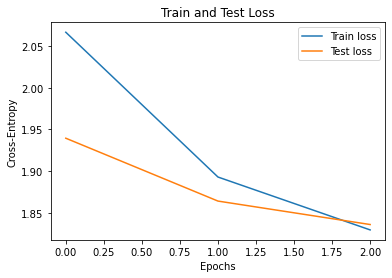

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()